In [2]:
#Читаем файл, выводим базовое представление
import pandas as pd
df = pd.read_excel("sampledatafoodinfo.xlsx")
df

,Category,Food Item,Measure,Calories,Protein,Fat,Carbs,Fibre
0,Baked Goods,"Angelfood, commercial (25cm diam)",1/12,73,2.0,NaN,16.0,0.4
1,Baked Goods,"Angelfood, from mix (25cm diam)",1/12,129,3.0,NaN,29.0,0.1
2,Baked Goods,"Animal crackers (arrowroot, social tea)",2,45,1.0,1.0,7.0,0.2
3,Baked Goods,"Apple crisp, homemade",125mL,206,2.0,4.0,39.0,1.8
4,Baked Goods,"Apple, commercial, 2 crust (23cm diam)",1/8,296,2.0,14.0,43.0,2.0
...,...,...,...,...,...,...,...,...
1089,Vegetables,"Vegetables, broccoli and cauliflower, frozen, ...",125mL,22,2.0,NaN,4.0,2.4
1090,Vegetables,"Vegetables, mixed (corn, lima beans, snap bean...",125mL,63,3.0,NaN,13.0,2.8
1091,Vegetables,"Vegetables, peas and carrots, canned, not drained",125mL,51,3.0,NaN,11.0,2.7
1092,Vegetables,"Zucchini, raw, slices",4,6,NaN,NaN,1.0,0.4


У нас база данных по продуктам, указана категория, к которой относится каждая единица, название, единица измерения, содержание калорий, белков, жиров, углеводов, пищевых волокон.

In [5]:
df.isnull().mean()

Category     0.0
Food Item    0.0
Measure      0.0
Calories     0.0
Protein      0.0
Fat          0.0
Carbs        0.0
Fibre        0.0
dtype: float64

In [4]:
#Убираем пропуски в данных
df.fillna(0, inplace=True)

In [6]:
#Посчитаем средние показатели по столбцам
avg = df.mean()
print(avg)

Calories    134.799817
Protein       6.824497
Fat           5.402011
Carbs        14.298903
Fibre         1.577057
dtype: float64


C:\Users\tsyku\AppData\Local\Temp\ipykernel_10324\2489862346.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = df.mean()


In [7]:
#Посчитаем стандартное отклонение по стоблцам
std = df.std()
print(std)

Calories    105.410760
Protein       7.912161
Fat           6.848427
Carbs        14.753890
Fibre         2.423700
dtype: float64


C:\Users\tsyku\AppData\Local\Temp\ipykernel_10324\1415648332.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = df.std()


In [8]:
#Посчитаем медианные значения по параметрам
mediana = df.median()
print(mediana)

Calories    116.0
Protein       3.0
Fat           3.0
Carbs        10.0
Fibre         0.8
dtype: float64


C:\Users\tsyku\AppData\Local\Temp\ipykernel_10324\2402975613.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediana = df.median()


Стандартное отклонение относительно среднего значения довольно большое, соответственно по данным есть большой разброс. При этом стандартное отклонение по белкам, жирам, углеводам, волокнам превышает среднее значение. При этом медианная калорийность превышает среднюю.

In [11]:
#Посмоттрим на среднюю калорийность по категориям продуктов
avgcal = df[['Category', 'Calories']].groupby(by = 'Category').mean()
print(avgcal)

                 Calories
Category                 
Baked Goods    219.744444
Beverages       98.250000
Dairy          118.822222
Eggs           201.454545
Fast Foods     325.463415
Fats and Oils   63.738095
Fish           110.360656
Fruit           59.438356
Grain/Cereal   125.530303
Legumes/Nuts   180.607843
Meat/Poultry   154.103448
Miscellaneous   38.222222
Mixed Dishes   325.743590
Snacks         128.913043
Soups          121.363636
Sweets         121.280000
Vegetables      44.672566


In [12]:
#Посчитаем среднее отклонение калорийности по категориям продуктов
std1 = df[['Category', 'Calories']].groupby(by = 'Category').std()
print(std1)

                 Calories
Category                 
Baked Goods    112.570733
Beverages       70.321299
Dairy           72.154575
Eggs           156.602276
Fast Foods     162.867292
Fats and Oils   41.042548
Fish            53.669368
Fruit           27.687736
Grain/Cereal    63.082091
Legumes/Nuts    46.408223
Meat/Poultry    54.589850
Miscellaneous   34.476674
Mixed Dishes   134.753912
Snacks          79.166059
Soups           56.371435
Sweets         100.207968
Vegetables      45.581254


In [13]:
#Посчитаем медианную калорийность по категориям
mediana1 = df.groupby('Category')['Calories'].median()
print(mediana1)

Category
Baked Goods      197.5
Beverages        103.0
Dairy            115.0
Eggs             189.0
Fast Foods       276.0
Fats and Oils     47.5
Fish              96.0
Fruit             58.0
Grain/Cereal     112.0
Legumes/Nuts     189.0
Meat/Poultry     148.0
Miscellaneous     22.0
Mixed Dishes     340.0
Snacks           144.0
Soups            134.0
Sweets           106.0
Vegetables        27.0
Name: Calories, dtype: float64


In [14]:
#Добавим столбец с суммарной массой макроэлементов, средней калорийностью категории и средним отклонением калорийности по категории 
df = df.assign(Macroelements = df['Protein'] + df['Fat'] + df['Carbs'] + df['Fibre'])
df['Average calories by category'] = df.groupby('Category')['Calories'].transform('mean')
df['Mean deviation'] = df.groupby('Category')['Calories'].transform('std')

In [15]:
df

,Category,Food Item,Measure,Calories,Protein,Fat,Carbs,Fibre,Macroelements,Average calories by category,Mean deviation
0,Baked Goods,"Angelfood, commercial (25cm diam)",1/12,73,2.0,0.0,16.0,0.4,18.4,219.744444,112.570733
1,Baked Goods,"Angelfood, from mix (25cm diam)",1/12,129,3.0,0.0,29.0,0.1,32.1,219.744444,112.570733
2,Baked Goods,"Animal crackers (arrowroot, social tea)",2,45,1.0,1.0,7.0,0.2,9.2,219.744444,112.570733
3,Baked Goods,"Apple crisp, homemade",125mL,206,2.0,4.0,39.0,1.8,46.8,219.744444,112.570733
4,Baked Goods,"Apple, commercial, 2 crust (23cm diam)",1/8,296,2.0,14.0,43.0,2.0,61.0,219.744444,112.570733
...,...,...,...,...,...,...,...,...,...,...,...
1089,Vegetables,"Vegetables, broccoli and cauliflower, frozen, ...",125mL,22,2.0,0.0,4.0,2.4,8.4,44.672566,45.581254
1090,Vegetables,"Vegetables, mixed (corn, lima beans, snap bean...",125mL,63,3.0,0.0,13.0,2.8,18.8,44.672566,45.581254
1091,Vegetables,"Vegetables, peas and carrots, canned, not drained",125mL,51,3.0,0.0,11.0,2.7,16.7,44.672566,45.581254
1092,Vegetables,"Zucchini, raw, slices",4,6,0.0,0.0,1.0,0.4,1.4,44.672566,45.581254


In [16]:
#Поменяем порядок столбцов на более удобный/наглядный + форматируем новые столбцы
df = df[['Food Item', 'Category', 'Measure', 'Protein', 'Fat', 'Carbs', 'Fibre', 'Macroelements', 'Average calories by category', 'Mean deviation', 'Calories']]
def formatirovanie_stolbcza(df):
    df = df.apply(lambda x: '{:.1f}'.format(float(x)))
    return df
df['Average calories by category'] = formatirovanie_stolbcza(df['Average calories by category'])
df['Mean deviation'] = formatirovanie_stolbcza(df['Mean deviation'])
df

,Food Item,Category,Measure,Protein,Fat,Carbs,Fibre,Macroelements,Average calories by category,Mean deviation,Calories
0,"Angelfood, commercial (25cm diam)",Baked Goods,1/12,2.0,0.0,16.0,0.4,18.4,219.7,112.6,73
1,"Angelfood, from mix (25cm diam)",Baked Goods,1/12,3.0,0.0,29.0,0.1,32.1,219.7,112.6,129
2,"Animal crackers (arrowroot, social tea)",Baked Goods,2,1.0,1.0,7.0,0.2,9.2,219.7,112.6,45
3,"Apple crisp, homemade",Baked Goods,125mL,2.0,4.0,39.0,1.8,46.8,219.7,112.6,206
4,"Apple, commercial, 2 crust (23cm diam)",Baked Goods,1/8,2.0,14.0,43.0,2.0,61.0,219.7,112.6,296
...,...,...,...,...,...,...,...,...,...,...,...
1089,"Vegetables, broccoli and cauliflower, frozen, ...",Vegetables,125mL,2.0,0.0,4.0,2.4,8.4,44.7,45.6,22
1090,"Vegetables, mixed (corn, lima beans, snap bean...",Vegetables,125mL,3.0,0.0,13.0,2.8,18.8,44.7,45.6,63
1091,"Vegetables, peas and carrots, canned, not drained",Vegetables,125mL,3.0,0.0,11.0,2.7,16.7,44.7,45.6,51
1092,"Zucchini, raw, slices",Vegetables,4,0.0,0.0,1.0,0.4,1.4,44.7,45.6,6


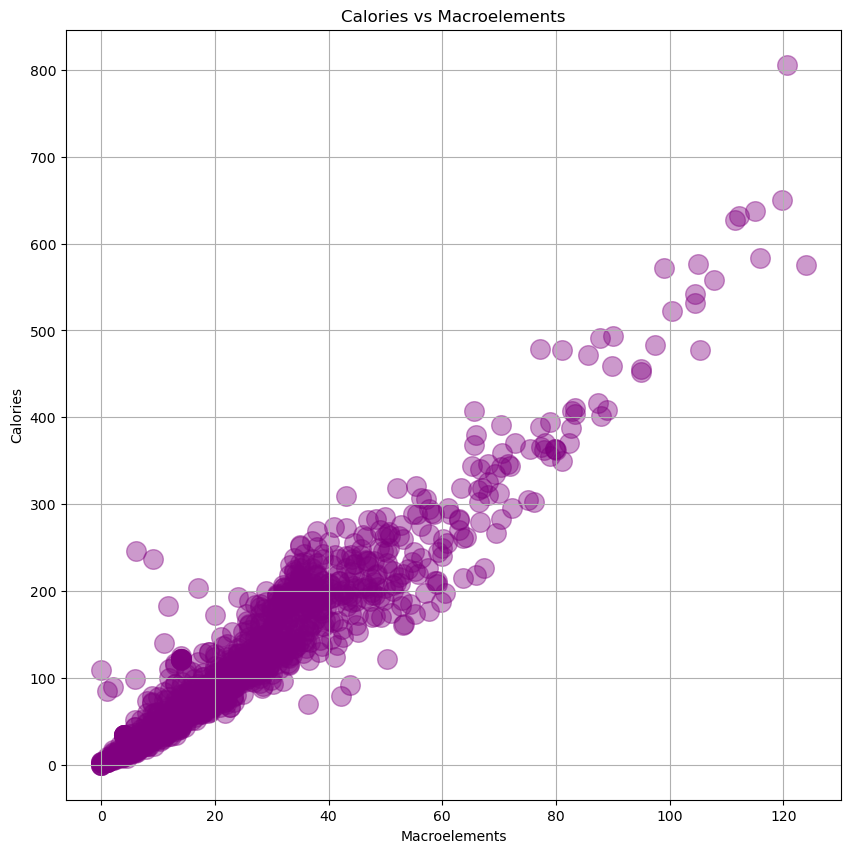

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.grid(True)
plt.scatter(x=df['Macroelements'], y=df['Calories'], color='purple', s=30, alpha=0.4)
plt.xlabel('Macroelements')
plt.ylabel('Calories')
plt.title('Calories vs Macroelements')
plt.show()

Видна прямая зависимость между калорийностью продукта и содержанием макроэлементов. Коэффицент примерно равен 5.

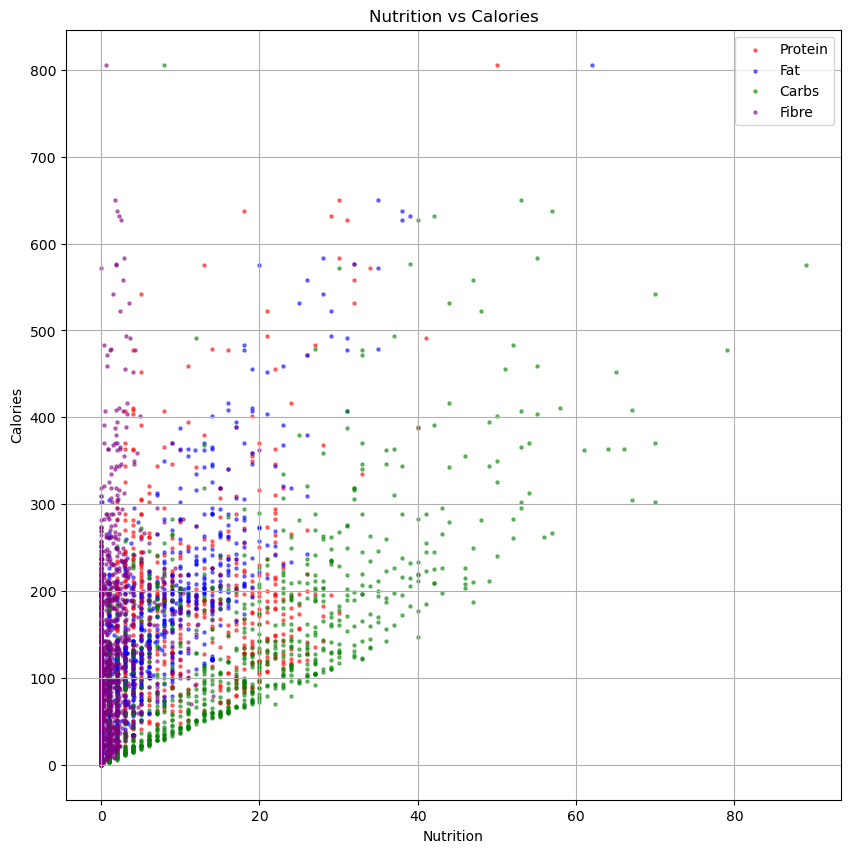

In [20]:
plt.figure(figsize=(10, 10))
plt.grid(True)
plt.scatter(y = df['Calories'], x = df['Protein'], color = 'red', s = 5, alpha = 0.5, label = 'Protein')
plt.scatter(y = df['Calories'], x = df['Fat'], color = 'blue', s = 5, alpha = 0.5, label = 'Fat')
plt.scatter(y = df['Calories'], x = df['Carbs'], color = 'green', s = 5, alpha = 0.5, label = 'Carbs')
plt.scatter(y = df['Calories'], x = df['Fibre'], color = 'purple', s = 5, alpha = 0.5, label = 'Fibre')
# добавляем подписи осей и графика
plt.ylabel('Calories')
plt.xlabel('Nutrition')
plt.title('Nutrition vs Calories')
plt.legend()

plt.show()

Наглядно видно, что Калорийность не зависит от содержания пищевых волокон, при этом подавляющее большинство продуктов содержит менее 5 грамм волокон. Наибольший разброс на графике у белка, в то время как жиры  в большом количестве находятся в высококалорийных продуктах и образуют прямую линии в корреляции с калорийностью. Углеводы ведут себя таким же образом, но наклон прямой меньше. При этом углеводы в большинстве продуктов являются преобладающим по массе макроэлементом.

<Figure size 1500x1500 with 0 Axes>

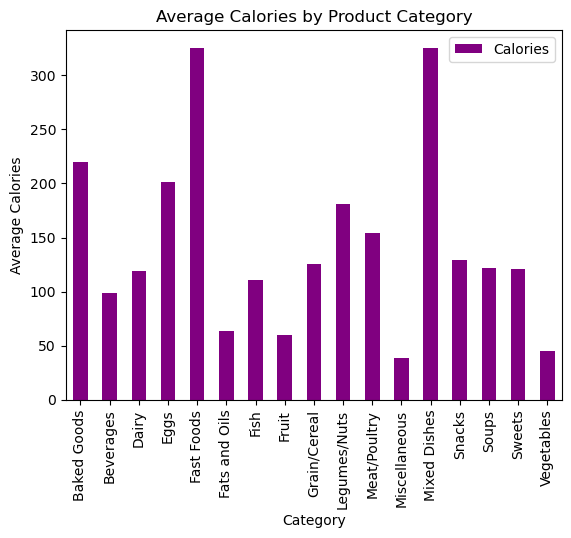

In [21]:
#Сделаем диаграмму по средней калорийности проудктов по категориям
plt.figure(figsize=(15, 15))
avgcal.plot(kind='bar', color='purple')
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.title('Average Calories by Product Category')
plt.show()

Видно, что наиболее калорийны сложные блюда, фастфуд и выпечка, в то время как наименее калорийны фрукты, овощи и прочие (не попавшие в другие категории)

In [22]:
dfavg = df.loc[:, ['Protein','Fat','Carbs','Fibre','Category']].groupby('Category').mean() 
print(dfavg)

                 Protein        Fat      Carbs     Fibre
Category                                                
Baked Goods     3.077778   9.411111  31.877778  1.124444
Beverages       0.479167   0.625000  15.937500  0.060417
Dairy           6.133333   3.082222  12.122222  5.155556
Eggs           12.818182  14.272727   5.909091  0.000000
Fast Foods     17.243902  15.951220  28.146341  1.792683
Fats and Oils   0.047619   6.833333   0.928571  0.000000
Fish           15.573770   4.114754   2.032787  0.000000
Fruit           0.684932   0.219178  14.726027  1.469863
Grain/Cereal    3.621212   1.833333  24.371212  2.290152
Legumes/Nuts    8.901961  10.901961  13.921569  4.250980
Meat/Poultry   17.572414   8.496552   0.468966  0.000000
Miscellaneous   1.037037   0.792593   4.000000  2.074074
Mixed Dishes   16.717949  15.615385  29.512821  2.135897
Snacks          2.956522   6.826087  15.043478  1.656522
Soups           6.606061   3.878788  15.424242  1.669697
Sweets          1.746667   4.73

In [ ]:
#Сделаем диаграмму по содержанию белков, жиров, углеводов, волокон по категориям
colors = ['red', 'blue', 'green', 'purple']
dfavg.plot(y=['Protein','Fat','Carbs','Fibre'], kind='bar', color=colors, width=0.8)
plt.show()

По данной диаграмме видно почему вышеназванные категории являлись наиболее калорийными - в них наибольшее содержание углеводов и одни из наибольшей показателей жиров. В то же время в низкокалорийных категориях жиры и белки минимальны. Заметно, что наиболььшее количество волокон содержится в молочной продукции и орехах.